In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
import time
from scipy.stats import truncnorm
np.random.seed(5)

In [2]:
def auction_exp(data_auction, p):
    """auction experiment simulation

    Args:
        data_auction: random sample data for auction simulation
        p: the reserve price
        
    Return:
        revenue: the expected revenue
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [14]:
# Experiment deterministic mechanismfor single-item and single-bidder case with truncated normal distribution
sigma_list_1 = []
DAPX_tnorm_1 = []
r_list_1 =[]
p_d_list_1 = []
p_opt_list_1 =[]

#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#function F is used to solve the reserve price for the optimal auction for truncated normal distributions
def F(x):
    return x-((1-truncnorm.cdf(x, a , b ,loc = u,scale = sigma))/truncnorm.pdf(x, a , b ,loc = u,scale = sigma))


n = 100000
myclip_a = 0
myclip_b = np.inf
u = 1 # set mean of the normal distribution to 1 before truncation 
tic = time.clock()

for i in np.linspace(0, 1, 25):
    sigma = 0.01 + i
    sigma_list_1.append(sigma)
    #computer alpha beta for truncated normal distribution
    a, b = (myclip_a - u) / sigma, myclip_b

    #mean and variance of truncated normal distribution
    mean, var = truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
    r = np.sqrt(var)/mean
    r_list_1.append(r)

    #prepare the random samples
    bid_tnorm = truncnorm.rvs(a , b , loc = u,scale = sigma,size=n)
    #experiment with Giannakopoulos et al. auction#######################
    p_d = fsolve(rho_D, [mean])
    p_d_list_1.append(p_d)
    print(rho_D(p_d))
    reserve_p = p_d*mean/(2*p_d-1)
    exp_revenue = auction_exp(bid_tnorm,reserve_p)
    ######################################################################
    #Following we experiment the optimal auction for uniform distribution
    p_opt = fsolve(F, mean-0.1)
    p_opt_list_1.append(p_opt)
    print(F(p_opt))
    opt = auction_exp(bid_tnorm,p_opt)
    ########################################################################
    
    #Compute the experimental DAPX
    DAPX_tnorm_1.append((opt/exp_revenue)[0])    


toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[-1.43182449e-16]
[-1.55431223e-14]
[-5.30825384e-16]
[1.77635684e-15]
[-1.69482484e-15]
[-8.8817842e-16]
[6.9388939e-18]
[-1.11022302e-16]
[-8.15320034e-16]
[2.73114864e-14]
[-1.03111963e-14]
[-7.23865412e-14]
[0.]
[-2.22044605e-16]
[-8.43769499e-15]
[2.95985458e-13]
[-4.16333634e-17]
[1.33226763e-15]
[-2.77555756e-17]
[-2.22044605e-16]
[2.77555756e-17]
[-2.22044605e-16]
[1.2490009e-15]
[8.92619312e-14]
[2.77555756e-17]
[5.66213743e-15]
[0.]
[1.11022302e-16]
[0.]
[0.]
[-5.55111512e-17]
[-1.11022302e-16]
[0.]
[2.22044605e-16]
[-1.22679644e-14]
[-4.4408921e-16]
[-2.55351296e-15]
[1.11022302e-16]
[-4.99600361e-16]
[0.]
[-5.55111512e-17]
[-2.22044605e-16]
[-5.55111512e-17]
[-1.06137321e-13]
[-5.55111512e-17]
[-5.3956839e-14]
[0.]
[-2.93098879e-14]
[0.]
[-1.70974346e-14]
time: 39.966852200000005


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [15]:
# Experiment deterministic mechanismfor single-item and single-bidder case with truncated normal distribution
sigma_list_2 = []
DAPX_tnorm_2 = []
r_list_2 =[]
p_d_list_2 = []
p_opt_list_2 =[]

#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#function F is used to solve the reserve price for the optimal auction for truncated normal distributions
def F(x):
    return x-((1-truncnorm.cdf(x, a , b ,loc = u,scale = sigma))/truncnorm.pdf(x, a , b ,loc = u,scale = sigma))


n = 100000
myclip_a = 0
myclip_b = np.inf
u = 1 # set mean of the normal distribution to 1 before truncation 
tic = time.clock()

for i in np.linspace(1,7,25):
    sigma = 0.01 + i
    sigma_list_2.append(sigma)
    #computer alpha beta for truncated normal distribution
    a, b = (myclip_a - u) / sigma, myclip_b

    #mean and variance of truncated normal distribution
    mean, var = truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
    r = np.sqrt(var)/mean
    r_list_2.append(r)

    #prepare the random samples
    bid_tnorm = truncnorm.rvs(a , b , loc = u, scale = sigma,size=n)
    #experiment with Giannakopoulos et al. auction#######################
    p_d = fsolve(rho_D, [mean])
    p_d_list_2.append(p_d)
    print(rho_D(p_d))
    reserve_p = p_d*mean/(2*p_d-1)
    exp_revenue = auction_exp(bid_tnorm,reserve_p)
    ######################################################################
    #Following we experiment the optimal auction for uniform distribution
    p_opt = fsolve(F, mean-0.1)
    p_opt_list_2.append(p_opt)
    print(F(p_opt))
    opt = auction_exp(bid_tnorm,p_opt)
    ########################################################################
    
    #Compute the experimental DAPX
    DAPX_tnorm_2.append((opt/exp_revenue)[0])    


toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[0.]
[-1.70974346e-14]
[-1.66533454e-16]
[-1.55431223e-15]
[0.]
[-6.66133815e-16]
[0.]
[-4.4408921e-16]
[5.55111512e-17]
[-2.22044605e-16]
[-7.21644966e-16]
[-4.4408921e-16]
[-1.11022302e-16]
[-4.4408921e-16]
[1.11022302e-16]
[-1.33226763e-15]
[0.]
[4.4408921e-16]
[0.]
[4.4408921e-16]
[0.]
[0.]
[1.33226763e-15]
[8.8817842e-16]
[0.]
[-8.8817842e-16]
[-1.11022302e-16]
[0.]
[0.]
[1.33226763e-15]
[0.]
[0.]
[1.11022302e-16]
[-1.77635684e-15]
[6.66133815e-16]
[0.]
[3.66373598e-15]
[8.8817842e-16]
[1.23234756e-14]
[0.]
[0.]
[8.8817842e-16]
[0.]
[-1.77635684e-15]
[1.11022302e-16]
[-8.8817842e-16]
[-1.11022302e-16]
[-2.66453526e-15]
[-1.11022302e-16]
[-2.66453526e-15]
time: 36.39430490000001


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


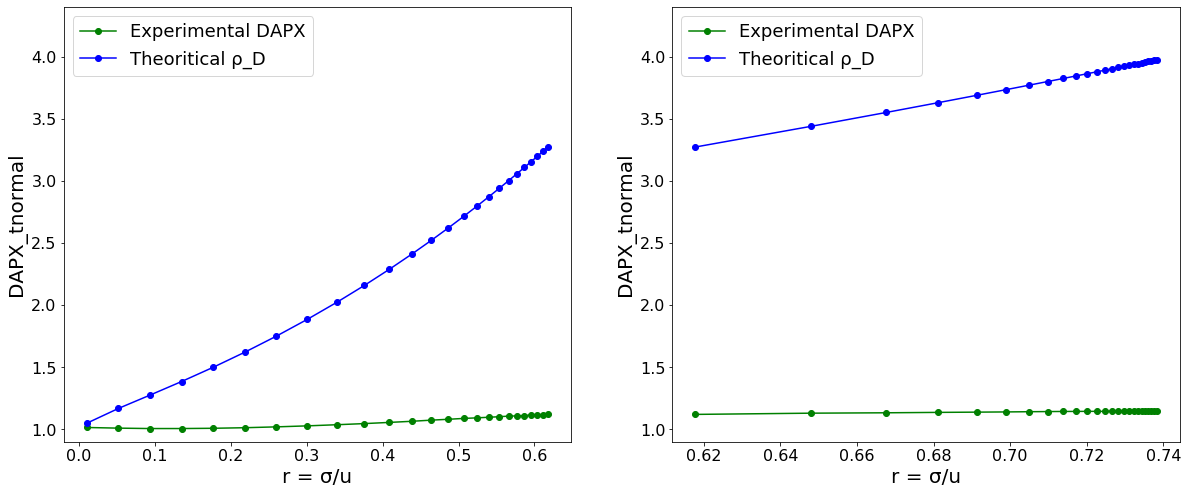

In [23]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(20, 8))
# make a plot
ax1.tick_params(axis='x', labelsize= 16)
ax1.tick_params(axis='y', labelsize= 16)
ax2.tick_params(axis='x', labelsize= 16)
ax2.tick_params(axis='y', labelsize= 16)
ax1.plot(r_list_1, DAPX_tnorm_1,color="green",marker="o",label="Experimental DAPX")
ax1.set_xlabel("r = \u03C3/u",fontsize=20)
ax1.set_ylabel("DAPX_tnormal",fontsize=20)
ax1.plot(r_list_1, p_d_list_1,color="blue",marker="o",label="Theoritical \u03C1_D")
ax1.set_ylim(0.9,4.4)
ax2.plot(r_list_2, DAPX_tnorm_2,color="green",marker="o",label="Experimental DAPX")
ax2.set_xlabel("r = \u03C3/u",fontsize=20)
ax2.set_ylabel("DAPX_tnormal",fontsize=20)
ax2.plot(r_list_2, p_d_list_2,color="blue",marker="o",label="Theoritical \u03C1_D")
ax2.set_ylim(0.9,4.4)
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

ax1.legend(loc="upper left",fontsize = 18)
ax2.legend(loc="upper left",fontsize = 18)
#plt.savefig("tnorm_dapx_r.png",bbox_inches='tight')
plt.show()


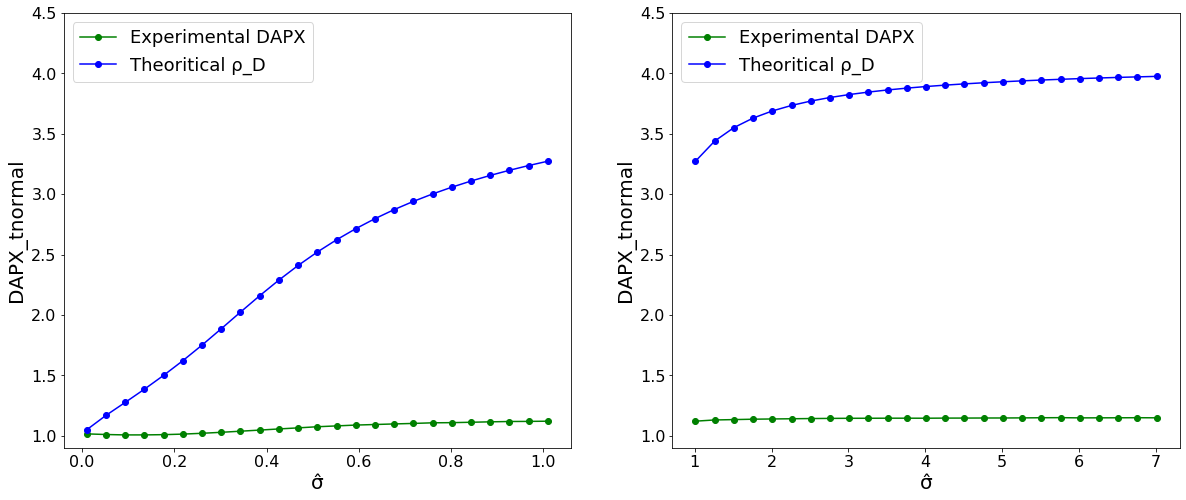

In [24]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(20, 8))
# make a plot
ax1.tick_params(axis='x', labelsize= 16)
ax1.tick_params(axis='y', labelsize= 16)
ax2.tick_params(axis='x', labelsize= 16)
ax2.tick_params(axis='y', labelsize= 16)
ax1.plot(sigma_list_1, DAPX_tnorm_1,color="green",marker="o",label="Experimental DAPX")
ax1.set_xlabel("\u03C3\u0302",fontsize=20)
ax1.set_ylabel("DAPX_tnormal",fontsize=20)
ax1.plot(sigma_list_1, p_d_list_1,color="blue",marker="o",label="Theoritical \u03C1_D")
ax1.set_ylim(0.9,4.5)
#ax1.set_title('u = 1',fontsize=18)
ax2.plot(sigma_list_2, DAPX_tnorm_2,color="green",marker="o",label="Experimental DAPX")
ax2.set_xlabel("\u03C3\u0302",fontsize=20)
ax2.set_ylabel("DAPX_tnormal",fontsize=20)
ax2.plot(sigma_list_2, p_d_list_2,color="blue",marker="o",label="Theoritical \u03C1_D")
#ax2.set_title('u = 10',fontsize=18)
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
ax1.legend(loc="upper left",fontsize = 18)
ax2.legend(loc="upper left",fontsize = 18)
ax2.set_ylim(0.9,4.5)
#plt.savefig("tnorm_dapx_s.png",bbox_inches='tight')
plt.show()


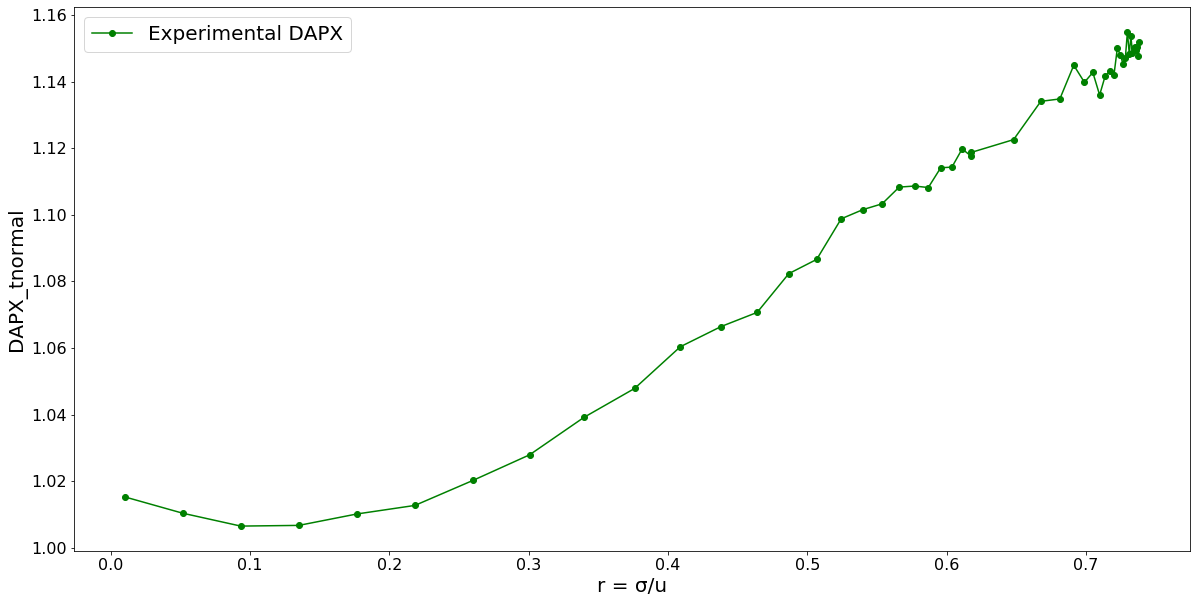

In [16]:
 # create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
r_list = r_list_1+r_list_2
DAPX_tnorm = DAPX_tnorm_1+DAPX_tnorm_2
# make a plot
ax.plot(r_list, DAPX_tnorm,color="green",marker="o",label="Experimental DAPX")

ax.legend(loc="upper left",fontsize = 20)

#ax.set_ylim(0.7,1.2)
ax.set_xlabel("r = \u03C3/u",fontsize=20)
ax.set_ylabel("DAPX_tnormal",fontsize=20)
ax.tick_params(axis='x', labelsize= 16)
ax.tick_params(axis='y', labelsize= 16)
#plt.savefig("tnorm_dapx_only.png",bbox_inches='tight')
plt.show()

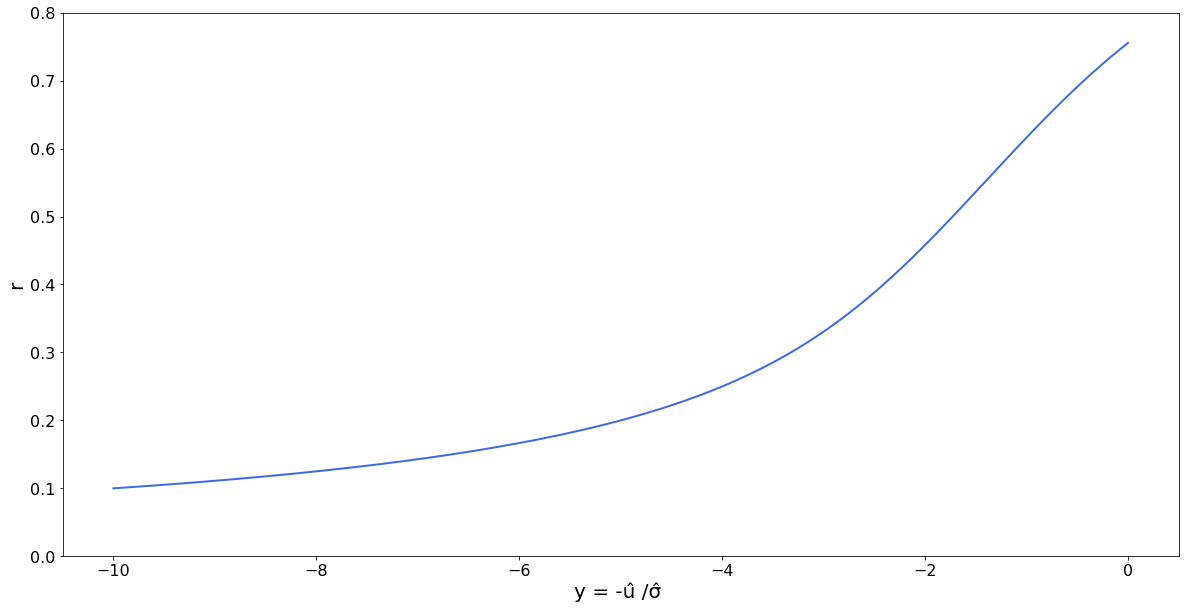

In [20]:
y = np.linspace(-10, 0, 1000)
h = norm.pdf(y)/(1-norm.cdf(y))
r = np.sqrt(1+y*h-h**2)/(-y +h)
test = y-h
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.tick_params(axis='x', labelsize= 16)
ax.tick_params(axis='y', labelsize= 16)
ax.plot(y, r,color="royalblue", linewidth = 2)
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_ylim(0,0.8)
ax.set_xlabel("y = -u\u0302 /\u03C3\u0302 ",fontsize=20)
# set y-axis label
ax.set_ylabel("r",fontsize=20)

#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.savefig("tnorm_r.png",bbox_inches='tight')
plt.show()
